## 1. Perkenalan

Bab pengenalan harus diisi dengan identitas, **query yang telah kalian buat pada Google Cloud Platform!**, dan _objective_ yang ingin dicapai.

Nama : **Rafif Dwiputra**

Batch : **FTDS-016-RMT**

Dataset : Credit Card

Objective : 
- Memperoleh data menggunakan BigQuery
- Memahami konsep supervised learning
- Mempersiapkan data untuk digunakan dalam model supervised learning
- Mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

## 2. Import Libraries

Cell_ pertama pada _notebook_ **harus berisi dan hanya berisi** semua _library_ yang digunakan dalam _project_.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

## 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

select limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month

from `bigquery-public-data.ml_datasets.credit_card_default`

limit 19980

**Query untuk mengambil data yang dibutuhkan dari **Google Cloud****

In [2]:
# Load Dataset 

data = pd.read_csv('credit_card.csv')
data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0
3,200000,1,1,1,58,0,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
4,500000,1,1,1,39,0,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000,2,3,1,39,-1,-1,-1,-1,-2,...,0,0,5000,5000,5000,0,5000,5000,470,0
2961,110000,2,2,2,24,-1,-1,-1,-1,0,...,36986,40053,41196,1352,1867,36986,5000,3000,23000,0
2962,160000,2,1,2,32,-1,-1,-1,-1,-1,...,3181,4998,1250,5726,5037,3182,5000,1252,749,0
2963,210000,2,1,1,38,0,0,-1,-1,0,...,23067,19972,45864,3000,4521,24000,10000,30000,6432,0


In [3]:
data_copy = data.copy()

In [4]:
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0
3,200000,1,1,1,58,0,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
4,500000,1,1,1,39,0,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0


In [5]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,80000,2,3,1,39,-1,-1,-1,-1,-2,...,0,0,5000,5000,5000,0,5000,5000,470,0
2961,110000,2,2,2,24,-1,-1,-1,-1,0,...,36986,40053,41196,1352,1867,36986,5000,3000,23000,0
2962,160000,2,1,2,32,-1,-1,-1,-1,-1,...,3181,4998,1250,5726,5037,3182,5000,1252,749,0
2963,210000,2,1,1,38,0,0,-1,-1,0,...,23067,19972,45864,3000,4521,24000,10000,30000,6432,0
2964,360000,2,2,1,37,-1,-1,0,-1,-1,...,10000,10000,10000,17444,10035,10000,10000,10000,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Melihat informasi dari setiap column yang dimiliki

In [7]:
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


# 4. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

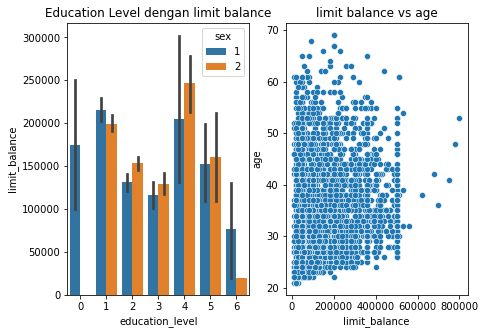

In [8]:
# Create Histogram




plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.barplot(data=data, x='education_level', y='limit_balance', hue='sex')
plt.title('Education Level dengan limit balance')

plt.subplot(1,4,2)
sns.scatterplot(x='limit_balance', y='age', data=data)
plt.title('limit balance vs age')

plt.show()

Dilihat dari persebaran scatterplot, umur tidak memiliki korelasi yang cukup tinggi untuk jumlah limit balance. Dan education level juga tidak berpengaruh dalam limit balance dikarenakan tersebar merata dalam setiap kategori education level. Dilihat dari barplot nya, education level dengan kategori 4 dengan sex kategori 2 memiliki jumlah limit balance paling banyak diantara kategori lain nya.

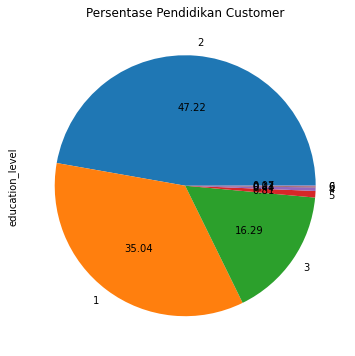

In [94]:
data['education_level'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f')
plt.title('Persentase Pendidikan Customer')
plt.show()

Jumlah pendidikan terbanyak adalah dengan kategori 2.

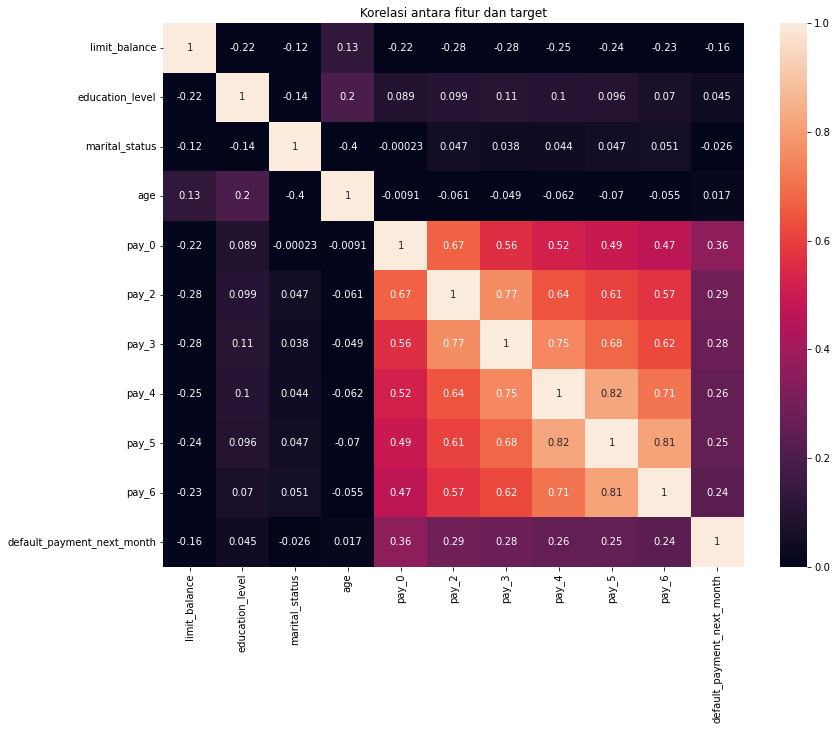

In [9]:
# siapkan kolom yang akan digunakan
corr1 = data[['limit_balance', 'education_level', 'marital_status', 'age','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']].corr()

# buat heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(corr1, annot= True, vmin=0, vmax=1)
plt.title('Korelasi antara fitur dan target')
plt.show()


Jika dilihat dari korelasi Heatmap nya, pay_0 sampai pay_6 memiliki korelasi yang cukup tinggi dengan target, akan tetapi kita akan menggunakan salah satunya saja agar tidak terjadinya overfit pada hasil nya. Karena, pay_0 memiliki korelasi yang paling tinggi maka kita akan menggunakan pay_0 dan sisanya akan di drop

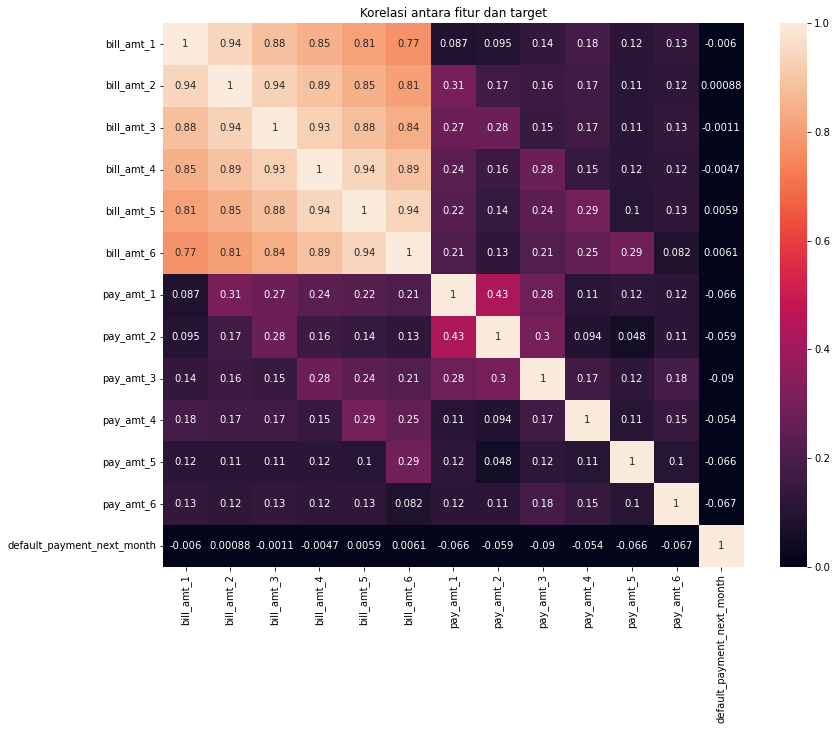

In [10]:
# siapkan kolom yang akan digunakan
corr2 = data[['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6',
                'default_payment_next_month']].corr()

# buat heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(corr2, annot= True, vmin=0, vmax=1)
plt.title('Korelasi antara fitur dan target')
plt.show()

Jika dilihat dari persebaran Heatmap nya, bil_amt dan pay_amt tidak memiliki korelasi yang cukup signifikan dengan data target nya, tetapi kita akan tetap menggunakan data tersebut untuk pengolahan data dan hanya akan menggunakan korelasi yang paling tinggi untuk tiap kategori nya. bil_amt_6 memiliki korelasi yang paling tinggi diantara kategori lain nya, oleh karena itu akan digunakan untuk kategori bil_amt. pay_amt_3 memiliki korelasi yang paling tinggi diantara kategori lain nya, oleh karrena itu akan digunakan untuk kategori pay_amt.

# 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [11]:
data_inf = data.sample(22, random_state=16)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2059,200000,1,2,1,35,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,28027,0
1004,50000,2,2,2,32,0,0,0,0,0,...,18088,18476,20168,1709,2004,7497,671,2000,6100,0
2173,30000,2,2,1,26,-2,-2,-2,-2,-2,...,2444,2309,0,11208,1211,2444,2615,0,0,0
994,400000,2,1,2,39,0,0,0,0,0,...,325340,328627,329948,13521,12374,11643,11868,18000,15000,0
890,350000,2,2,2,33,0,0,0,0,0,...,182381,194678,215024,50070,10000,8000,15036,30050,8110,0
2557,140000,1,1,2,29,-1,-1,-1,-1,-1,...,2573,495,1744,2024,1522,2580,496,1749,2265,0
851,20000,2,2,1,27,3,2,0,0,2,...,6490,6837,6435,0,1095,900,596,0,0,1
289,70000,1,3,2,38,0,0,0,0,0,...,57118,27510,27176,2682,2563,1568,970,1000,2000,1
1036,90000,2,1,2,33,0,0,2,0,0,...,91165,72263,72569,8500,0,4086,2600,3000,3000,0
2364,210000,2,1,2,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


Mengambil data inference untuk model inference

In [12]:
data_train_set = data.drop(data_inf.index)
data_train_set

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0
3,200000,1,1,1,58,0,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
4,500000,1,1,1,39,0,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000,2,3,1,39,-1,-1,-1,-1,-2,...,0,0,5000,5000,5000,0,5000,5000,470,0
2961,110000,2,2,2,24,-1,-1,-1,-1,0,...,36986,40053,41196,1352,1867,36986,5000,3000,23000,0
2962,160000,2,1,2,32,-1,-1,-1,-1,-1,...,3181,4998,1250,5726,5037,3182,5000,1252,749,0
2963,210000,2,1,1,38,0,0,-1,-1,0,...,23067,19972,45864,3000,4521,24000,10000,30000,6432,0


In [13]:
data_train_set.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,200000,1,2,1,35,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,28027,0
1,50000,2,2,2,32,0,0,0,0,0,...,18088,18476,20168,1709,2004,7497,671,2000,6100,0
2,30000,2,2,1,26,-2,-2,-2,-2,-2,...,2444,2309,0,11208,1211,2444,2615,0,0,0
3,400000,2,1,2,39,0,0,0,0,0,...,325340,328627,329948,13521,12374,11643,11868,18000,15000,0
4,350000,2,2,2,33,0,0,0,0,0,...,182381,194678,215024,50070,10000,8000,15036,30050,8110,0
5,140000,1,1,2,29,-1,-1,-1,-1,-1,...,2573,495,1744,2024,1522,2580,496,1749,2265,0
6,20000,2,2,1,27,3,2,0,0,2,...,6490,6837,6435,0,1095,900,596,0,0,1
7,70000,1,3,2,38,0,0,0,0,0,...,57118,27510,27176,2682,2563,1568,970,1000,2000,1
8,90000,2,1,2,33,0,0,2,0,0,...,91165,72263,72569,8500,0,4086,2600,3000,3000,0
9,210000,2,1,2,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,200000,1,2,1,35,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,28027,0
1,50000,2,2,2,32,0,0,0,0,0,...,18088,18476,20168,1709,2004,7497,671,2000,6100,0
2,30000,2,2,1,26,-2,-2,-2,-2,-2,...,2444,2309,0,11208,1211,2444,2615,0,0,0
3,400000,2,1,2,39,0,0,0,0,0,...,325340,328627,329948,13521,12374,11643,11868,18000,15000,0
4,350000,2,2,2,33,0,0,0,0,0,...,182381,194678,215024,50070,10000,8000,15036,30050,8110,0
5,140000,1,1,2,29,-1,-1,-1,-1,-1,...,2573,495,1744,2024,1522,2580,496,1749,2265,0
6,20000,2,2,1,27,3,2,0,0,2,...,6490,6837,6435,0,1095,900,596,0,0,1
7,70000,1,3,2,38,0,0,0,0,0,...,57118,27510,27176,2682,2563,1568,970,1000,2000,1
8,90000,2,1,2,33,0,0,2,0,0,...,91165,72263,72569,8500,0,4086,2600,3000,3000,0
9,210000,2,1,2,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [83]:
data_inf = data_inf.drop(['pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
                    'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5',
                    'pay_amt_1', 'pay_amt_2', 'pay_amt_4', 'pay_amt_5','pay_amt_6','default_payment_next_month'], axis=1)

## Splitting between 'X' (Features) and 'y' (target)

In [15]:
# data fitur (X)
X = data_train_set.drop('default_payment_next_month', axis=1)

# data target
y = data_train_set['default_payment_next_month']

X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,130000,1,1,1,45,0,0,0,0,0,...,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
1,230000,1,2,1,41,0,0,0,0,0,...,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226
2,50000,1,2,1,42,0,0,0,0,0,...,30660,31320,36227,35569,2007,2000,1500,5400,0,3000
3,200000,1,1,1,58,0,0,0,0,0,...,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698
4,500000,1,1,1,39,0,0,0,0,0,...,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,80000,2,3,1,39,-1,-1,-1,-1,-2,...,5000,0,0,5000,5000,5000,0,5000,5000,470
2939,110000,2,2,2,24,-1,-1,-1,-1,0,...,1867,36986,40053,41196,1352,1867,36986,5000,3000,23000
2940,160000,2,1,2,32,-1,-1,-1,-1,-1,...,5030,3181,4998,1250,5726,5037,3182,5000,1252,749
2941,210000,2,1,1,38,0,0,-1,-1,0,...,4168,23067,19972,45864,3000,4521,24000,10000,30000,6432


In [16]:
# split train dan test dari fitur dan target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (2354, 23)
Test Size : (589, 23)


In [17]:
X_train

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
99,50000,1,3,1,51,0,0,0,0,0,...,46716,29744,30060,29449,2000,1400,984,1013,1006,939
519,500000,1,3,1,55,2,0,0,0,0,...,334227,145482,125936,91382,37300,11000,4500,4000,4000,100000
2439,210000,1,1,1,37,-1,-1,-1,-1,-1,...,1188,2667,546,578,565,1188,2667,546,578,2769
937,50000,2,2,2,26,0,0,0,0,0,...,35674,31113,31734,32488,1614,1546,1461,1082,1210,1203
1676,20000,1,2,1,26,1,2,2,2,2,...,12380,11884,12894,12540,0,2000,0,1203,0,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,200000,2,2,1,50,-2,-1,0,0,-1,...,7428,10234,5380,7532,6640,1025,10249,5380,5000,2261
2790,230000,2,1,2,29,-1,-1,-1,-1,-1,...,3432,495,495,495,466,3461,495,495,495,0
74,50000,1,3,1,46,0,0,0,0,0,...,58108,55774,53589,51345,2200,2200,2000,1967,2002,1727
2224,140000,2,2,1,44,0,0,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


## Handling Outlier

In [18]:
def diagnostic_plots(X_train, variable):
    plt.figure(figsize=(15,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

Distribusi dan boxplot age sebelum capping
Skewness value :  0.77120032499955


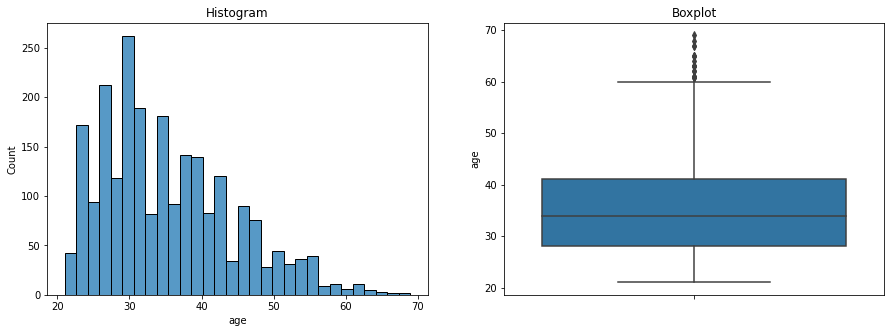

In [19]:
print('Distribusi dan boxplot age sebelum capping')
print('Skewness value : ', X_train['age'].skew())

diagnostic_plots(X_train, 'age')


Karena data pada column 'age' mempunyai outlier lebih dari 0.5, artinya data tersebut extremely skewed distribution dan akan diisi dengan median

In [20]:
from feature_engine.outliers import Winsorizer

windsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['age'])

windsorizer.fit(X_train)

X_train_ = windsorizer.transform(X_train)

Distribusi dan boxplot age sesudah capping
Skewness value :  0.7158544006517175


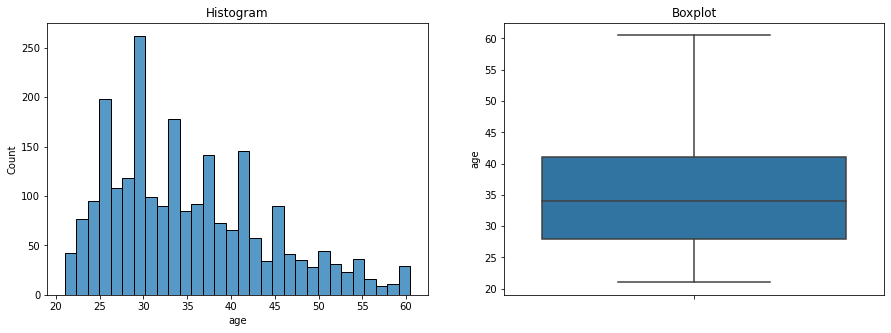

In [21]:
print('Distribusi dan boxplot age sesudah capping')
print('Skewness value : ', X_train_['age'].skew())

X_train = X_train_

diagnostic_plots(X_train, 'age')

## Handling Missing Values

In [22]:
print('X Train Null : ', X_train.isnull().sum().sum())
print('X Test Null : ',X_test.isnull().sum().sum())
print('y Train Null : ',y_train.isnull().sum().sum())
print('y Test Null : ',y_test.isnull().sum().sum())

X Train Null :  0
X Test Null :  0
y Train Null :  0
y Test Null :  0


Dari dataset yang kita miliki, tidak ditemukan Missing Value.

## Feature Selection

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 99 to 338
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_balance    2354 non-null   int64  
 1   sex              2354 non-null   int64  
 2   education_level  2354 non-null   int64  
 3   marital_status   2354 non-null   int64  
 4   age              2354 non-null   float64
 5   pay_0            2354 non-null   int64  
 6   pay_2            2354 non-null   int64  
 7   pay_3            2354 non-null   int64  
 8   pay_4            2354 non-null   int64  
 9   pay_5            2354 non-null   int64  
 10  pay_6            2354 non-null   int64  
 11  bill_amt_1       2354 non-null   int64  
 12  bill_amt_2       2354 non-null   int64  
 13  bill_amt_3       2354 non-null   int64  
 14  bill_amt_4       2354 non-null   int64  
 15  bill_amt_5       2354 non-null   int64  
 16  bill_amt_6       2354 non-null   int64  
 17  pay_amt_1     

In [24]:
X_train.drop(['pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
                    'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5',
                    'pay_amt_1', 'pay_amt_2', 'pay_amt_4', 'pay_amt_5','pay_amt_6'], axis=1, inplace=True)

In [25]:
X_test.drop(['pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
            'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5',
            'pay_amt_1', 'pay_amt_2', 'pay_amt_4', 'pay_amt_5','pay_amt_6'], axis=1, inplace=True)

In [26]:
X_train

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_6,pay_amt_3
99,50000,1,3,1,51.0,0,29449,984
519,500000,1,3,1,55.0,2,91382,4500
2439,210000,1,1,1,37.0,-1,578,2667
937,50000,2,2,2,26.0,0,32488,1461
1676,20000,1,2,1,26.0,1,12540,0
...,...,...,...,...,...,...,...,...
866,200000,2,2,1,50.0,-2,7532,10249
2790,230000,2,1,2,29.0,-1,495,495
74,50000,1,3,1,46.0,0,51345,2000
2224,140000,2,2,1,44.0,0,0,0


### Features Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_final = scaler.transform(X_train)
X_test_final = scaler.transform(X_test)

In [28]:
X_train_final_df = pd.DataFrame(X_train_final, columns=['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
                                                        'pay_0', 'bill_amt_6', 'pay_amt_3'])

X_train_final_df

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_6,pay_amt_3
0,0.050633,0.0,0.500000,0.333333,0.759494,0.2,0.202609,0.004940
1,0.620253,0.0,0.500000,0.333333,0.860759,0.4,0.324030,0.022589
2,0.253165,0.0,0.166667,0.333333,0.405063,0.1,0.146006,0.013388
3,0.050633,1.0,0.333333,0.666667,0.126582,0.2,0.208567,0.007334
4,0.012658,0.0,0.333333,0.333333,0.126582,0.3,0.169458,0.000000
...,...,...,...,...,...,...,...,...
2349,0.240506,1.0,0.333333,0.333333,0.734177,0.0,0.159640,0.051448
2350,0.278481,1.0,0.166667,0.666667,0.202532,0.1,0.145844,0.002485
2351,0.050633,0.0,0.500000,0.333333,0.632911,0.2,0.245536,0.010040
2352,0.164557,1.0,0.333333,0.333333,0.582278,0.2,0.144873,0.000000


# 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

### 6.1 Logistic Regression

In [29]:
#Model logistic regression
logreg = LogisticRegression()

In [30]:
# validasi dilakukan 5 kali
k_logreg=KFold(n_splits=5)

# cross validation
score_logreg = cross_val_score(logreg, X_train_final, y_train, cv=k_logreg)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_logreg))
print("rata-rata Cross Validation score :{}".format(score_logreg.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_logreg.std()))

Score 5 Cross Validation [0.82165605 0.80254777 0.80042463 0.82802548 0.82765957]
rata-rata Cross Validation score :0.8160627004562497
Standar deviasi Cross Validation score :0.012133290720761481


### 6.2 SVM

In [31]:
svm = SVC()

In [32]:
k_svm = KFold(n_splits=5)

# cross validation
score_svm= cross_val_score(svm, X_train_final, y_train, cv=k_svm)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_svm))
print("rata-rata Cross Validation score :{}".format(score_svm.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_svm.std()))

Score 5 Cross Validation [0.82377919 0.81316348 0.80254777 0.83014862 0.84042553]
rata-rata Cross Validation score :0.8220129195464608
Standar deviasi Cross Validation score :0.013157037686003846


### 6.3 Decision Tree

In [33]:
decision_tree = DecisionTreeClassifier()

In [34]:
k_dt = KFold(n_splits=5)

# cross validation
score_dt= cross_val_score(decision_tree, X_train_final, y_train, cv=k_dt)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_dt))
print("rata-rata Cross Validation score :{}".format(score_dt.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_dt.std()))

Score 5 Cross Validation [0.74734607 0.73248408 0.75796178 0.7388535  0.74893617]
rata-rata Cross Validation score :0.7451163210913855
Standar deviasi Cross Validation score :0.008756316959004456


### 6.4 Random Forest

In [35]:
random_forest = RandomForestClassifier()

In [36]:
k_rf = KFold(n_splits=5)

# cross validation
score_rf= cross_val_score(random_forest, X_train_final, y_train, cv=k_rf)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_rf))
print("rata-rata Cross Validation score :{}".format(score_rf.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_rf.std()))

Score 5 Cross Validation [0.85562633 0.81104034 0.82802548 0.83651805 0.83829787]
rata-rata Cross Validation score :0.8339016126846456
Standar deviasi Cross Validation score :0.014527923465580099


### 6.5 KNN

In [37]:
knn = KNeighborsClassifier()

In [38]:
k_knn = KFold(n_splits=5)

# cross validation
score_knn= cross_val_score(knn, X_train_final, y_train, cv=k_knn)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_knn))
print("rata-rata Cross Validation score :{}".format(score_knn.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_knn.std()))

Score 5 Cross Validation [0.84076433 0.79617834 0.78980892 0.78980892 0.81914894]
rata-rata Cross Validation score :0.8071418891448706
Standar deviasi Cross Validation score :0.019978493161525033


### 6.5 Naive Bayes

In [39]:
naive_bayes = GaussianNB()

In [40]:
k_nb = KFold(n_splits=5)

# cross validation
score_nb= cross_val_score(naive_bayes, X_train_final, y_train, cv=k_nb)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_nb))
print("rata-rata Cross Validation score :{}".format(score_nb.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_nb.std()))

Score 5 Cross Validation [0.78131635 0.80042463 0.79193206 0.78556263 0.78085106]
rata-rata Cross Validation score :0.7880173465239192
Standar deviasi Cross Validation score :0.007369534969056888


### 6.6 Linear Regression

In [41]:
ada_boost = AdaBoostClassifier()

In [42]:
k_linreg = KFold(n_splits=5)

# cross validation
score_ab= cross_val_score(ada_boost, X_train_final, y_train, cv=k_linreg)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_ab))
print("rata-rata Cross Validation score :{}".format(score_ab.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_ab.std()))

Score 5 Cross Validation [0.84713376 0.82802548 0.82802548 0.82590234 0.84042553]
rata-rata Cross Validation score :0.833902516149433
Standar deviasi Cross Validation score :0.008374933401536132


In [43]:
#Mean

mean_logreg = score_logreg.mean()
mean_svm = score_svm.mean()
mean_dt = score_dt.mean()
mean_rf = score_rf.mean()
mean_knn = score_knn.mean()
mean_nb = score_nb.mean()
mean_ab = score_ab.mean()

#Std

std_logreg = score_logreg.std()
std_svm = score_svm.std()
std_dt = score_dt.std()
std_rf = score_rf.std()
std_knn = score_knn.std()
std_nb = score_nb.std()
std_ab = score_ab.std()

In [44]:
#DataFrame Cross Validation
crossval = {'model' : ['LogReg', 'SVM', 'DT', 'RF', 'KNN', 'NB', 'AB'],
    'Mean' : [mean_logreg, mean_svm, mean_dt, mean_rf, mean_knn, mean_nb, mean_ab],
    'Stdev' : [std_logreg, std_svm, std_dt, std_rf, std_knn, std_nb, std_ab],

    }

data_crossval = pd.DataFrame(crossval)
data_crossval.sort_values('Mean', ascending=False)

,model,Mean,Stdev
6,AB,0.833903,0.008375
3,RF,0.833902,0.014528
1,SVM,0.822013,0.013157
0,LogReg,0.816063,0.012133
4,KNN,0.807142,0.019978
5,NB,0.788017,0.007370
2,DT,0.745116,0.008756


Dari model yang sudah di definisikan, terlihat bahwa model Random Forest memiliki rataan mean paling tinggi.
Oleh karena itu Random Forest dipilih sebagai model untuk dilakukan GridSearchCV

In [45]:
# definisikan paramater
param_ada = {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 1],
            'algorithm': ['SAMME', 'SAMME.R']
}
# gridseacrh dengan cross validation 5 kali
ada_grid = GridSearchCV(ada_boost, param_ada, cv=5, scoring='accuracy', return_train_score=True)

## 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### Logistic Regression

In [46]:
logreg.fit(X_train_final, y_train)

LogisticRegression()

### SVM

In [47]:
svm.fit(X_train_final, y_train)

SVC()

### Decision Tree

In [48]:
decision_tree.fit(X_train_final, y_train)

DecisionTreeClassifier()

### Random Forest

In [49]:
random_forest.fit(X_train_final, y_train)

RandomForestClassifier()

### KNN

In [50]:
knn.fit(X_train_final, y_train)

KNeighborsClassifier()

### Naive Bayes

In [51]:
naive_bayes.fit(X_train_final, y_train)

GaussianNB()

### Ada Boost

In [52]:
ada_boost_default = ada_boost.fit(X_train_final, y_train)

In [53]:
ada_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]},
             return_train_score=True, scoring='accuracy')

In [54]:
ada_best = ada_grid.best_estimator_

## 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

### Logistic Regression

In [55]:
y_pred_train_logreg = logreg.predict(X_train_final)
y_pred_test_logreg = logreg.predict(X_test_final)

In [56]:

print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_logreg))


print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_logreg))

Hasil prediksi train-set
[[1823   33]
 [ 375  123]]

 Hasil prediksi test-set
[[447  11]
 [109  22]]


In [57]:
# hasil train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_logreg))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_logreg))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1856
           1       0.79      0.25      0.38       498

    accuracy                           0.83      2354
   macro avg       0.81      0.61      0.64      2354
weighted avg       0.82      0.83      0.79      2354


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       458
           1       0.67      0.17      0.27       131

    accuracy                           0.80       589
   macro avg       0.74      0.57      0.57       589
weighted avg       0.77      0.80      0.75       589



Dilihat dari f1-score untuk data train set 0 dan test set 0 sudah menghasilkan nilai yang bagus, tetapi untuk train set 1 dan test 1 masih belum mendekati 1 yang artinya data masih kurang bagus.

Dilihat dari score accuracy nya, kedua data train set maupun test set sudah memiliki accuracy yang tergolong bagus.

### SVM

In [58]:
y_pred_train_svm = svm.predict(X_train_final)
y_pred_test_svm = svm.predict(X_test_final)

In [59]:
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_svm))


print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_svm))

Hasil prediksi train-set
[[1805   51]
 [ 329  169]]

 Hasil prediksi test-set
[[444  14]
 [ 98  33]]


In [60]:
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_svm))


print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_svm))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1856
           1       0.77      0.34      0.47       498

    accuracy                           0.84      2354
   macro avg       0.81      0.66      0.69      2354
weighted avg       0.83      0.84      0.81      2354

Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       458
           1       0.70      0.25      0.37       131

    accuracy                           0.81       589
   macro avg       0.76      0.61      0.63       589
weighted avg       0.79      0.81      0.77       589



Dilihat dari f1-score untuk data train set 0 dan test set 0 sudah menghasilkan nilai yang bagus, tetapi untuk train set 1 dan test 1 masih belum mendekati 1 yang artinya data masih kurang bagus.

Dilihat dari score accuracy nya, kedua data train set maupun test set sudah memiliki accuracy yang tergolong bagus.

### Decision Tree

In [61]:
y_pred_train_dt = decision_tree.predict(X_train_final)
y_pred_test_dt = decision_tree.predict(X_test_final)

In [62]:
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_dt))


print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_dt))

Hasil prediksi train-set
[[1856    0]
 [   0  498]]

 Hasil prediksi test-set
[[370  88]
 [ 79  52]]


In [63]:
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_dt))


print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_dt))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1856
           1       1.00      1.00      1.00       498

    accuracy                           1.00      2354
   macro avg       1.00      1.00      1.00      2354
weighted avg       1.00      1.00      1.00      2354

Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       458
           1       0.37      0.40      0.38       131

    accuracy                           0.72       589
   macro avg       0.60      0.60      0.60       589
weighted avg       0.72      0.72      0.72       589



Dilihat dari hasil f1-score, data train-set memiliki nilai 1, yang artinya memiliki prediksi 100% benar. begitu juga dengan tingkat akurasi nya. artinya dengan decision tree model trainset berhasil di prediksi dengan benar semua. Tetapi, untuk test set nya masih kurang yaitu di angka 72%

### Random Forest

In [64]:
y_pred_train_rf = random_forest.predict(X_train_final)
y_pred_test_rf = random_forest.predict(X_test_final)

In [65]:
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_rf))


print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_rf))

Hasil prediksi train-set
[[1856    0]
 [   1  497]]

 Hasil prediksi test-set
[[440  18]
 [ 88  43]]


In [66]:
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_rf))


print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_rf))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1856
           1       1.00      1.00      1.00       498

    accuracy                           1.00      2354
   macro avg       1.00      1.00      1.00      2354
weighted avg       1.00      1.00      1.00      2354

Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       458
           1       0.70      0.33      0.45       131

    accuracy                           0.82       589
   macro avg       0.77      0.64      0.67       589
weighted avg       0.80      0.82      0.79       589



Dilihat dari hasil f1-score, data train-set memiliki nilai 1, yang artinya memiliki prediksi 100% benar. begitu juga dengan tingkat akurasi nya. artinya dengan random forest model trainset berhasil di prediksi dengan benar semua. Tetapi, untuk test set nya di angka 82% yang dimana sudah tergolong bagus.

### KNN

In [67]:
y_pred_train_knn = knn.predict(X_train_final)
y_pred_test_knn = knn.predict(X_test_final)

In [68]:
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_knn))


print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_knn))

Hasil prediksi train-set
[[1804   52]
 [ 296  202]]

 Hasil prediksi test-set
[[439  19]
 [101  30]]


In [69]:
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_knn))


print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_knn))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1856
           1       0.80      0.41      0.54       498

    accuracy                           0.85      2354
   macro avg       0.83      0.69      0.72      2354
weighted avg       0.85      0.85      0.83      2354

Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       458
           1       0.61      0.23      0.33       131

    accuracy                           0.80       589
   macro avg       0.71      0.59      0.61       589
weighted avg       0.77      0.80      0.76       589



Dari clasification report hasil akurasi yang diperoleh dari train 85% dan test 82% masih memiliki perbedaan 2% jadi model overfit sedikit. Untuk hasil f1-score untuk label 0 nilai yang diperoleh cukup baik karena data cukup banyak sedangkan untuk label 1 nilainya masih jelek karena datanya yang sedikit.

### Naive Bayes

In [70]:
y_pred_train_nb = naive_bayes.predict(X_train_final)
y_pred_test_nb = naive_bayes.predict(X_test_final)

In [71]:
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_nb))


print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_nb))

Hasil prediksi train-set
[[1607  249]
 [ 242  256]]

 Hasil prediksi test-set
[[393  65]
 [ 76  55]]


In [72]:
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_nb))


print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_nb))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1856
           1       0.51      0.51      0.51       498

    accuracy                           0.79      2354
   macro avg       0.69      0.69      0.69      2354
weighted avg       0.79      0.79      0.79      2354

Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       458
           1       0.46      0.42      0.44       131

    accuracy                           0.76       589
   macro avg       0.65      0.64      0.64       589
weighted avg       0.75      0.76      0.76       589



Dari classification report, diketahui nilai f1-score untuk trainset dan testset nya sudah cukup baik, tetapi kategori (1) masih belum baik bisa jadi dikarenakan jumlah datanya yang cukup sedikit. Untuk accuracy masih tergolong underfit

### Ada Boost - Base Parameter

In [73]:
y_pred_train_adaboost = ada_boost.predict(X_train_final)
y_pred_test_adaboost = ada_boost.predict(X_test_final)

In [74]:
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_adaboost))


print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_adaboost))

Hasil prediksi train-set
[[1787   69]
 [ 306  192]]

 Hasil prediksi test-set
[[442  16]
 [ 89  42]]


In [75]:
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_adaboost))


print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_adaboost))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1856
           1       0.74      0.39      0.51       498

    accuracy                           0.84      2354
   macro avg       0.79      0.67      0.71      2354
weighted avg       0.83      0.84      0.82      2354


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       458
           1       0.72      0.32      0.44       131

    accuracy                           0.82       589
   macro avg       0.78      0.64      0.67       589
weighted avg       0.81      0.82      0.79       589



Dilihat dari f1-score untuk data train set 0 dan test set 0 sudah menghasilkan nilai yang bagus, tetapi untuk train set 1 dan test 1 masih belum mendekati 1 yang artinya data masih kurang bagus.

Dilihat dari score accuracy nya, kedua data train set maupun test set sudah memiliki accuracy yang tergolong bagus.

### Ada Boost - Best Parameter

In [76]:
y_pred_train_adaboost_best = ada_best.predict(X_train_final)
y_pred_test_adaboost_best = ada_best.predict(X_test_final)

In [77]:
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_adaboost_best))


print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_adaboost_best))

Hasil prediksi train-set
[[1792   64]
 [ 312  186]]

 Hasil prediksi test-set
[[442  16]
 [ 88  43]]


In [78]:
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_adaboost_best))


print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_adaboost_best))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1856
           1       0.74      0.37      0.50       498

    accuracy                           0.84      2354
   macro avg       0.80      0.67      0.70      2354
weighted avg       0.83      0.84      0.82      2354


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       458
           1       0.73      0.33      0.45       131

    accuracy                           0.82       589
   macro avg       0.78      0.65      0.67       589
weighted avg       0.81      0.82      0.80       589



Untuk model yang sudah ditunning, tidak terlihat perbedaan pada yang cukup signifikan dari data sebelum ditunning. Hasilnya masih sama saja dengan data sebelum ditunning.

## 9. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

### Ada Boost

In [95]:
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_6,pay_amt_3
0,200000,1,2,1,35,1,0,0
1,50000,2,2,2,32,0,20168,7497
2,30000,2,2,1,26,-2,0,2444
3,400000,2,1,2,39,0,329948,11643
4,350000,2,2,2,33,0,215024,8000
5,140000,1,1,2,29,-1,1744,2580
6,20000,2,2,1,27,3,6435,900
7,70000,1,3,2,38,0,27176,1568
8,90000,2,1,2,33,0,72569,4086
9,210000,2,1,2,31,1,0,0


In [84]:
data_inf_final = scaler.transform(data_inf)

In [85]:
y_pred_inf_adabase = ada_boost.predict(data_inf_final)
y_pred_inf_adabase

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [86]:
y_pred_inf_adabest = ada_best.predict(data_inf_final)
y_pred_inf_adabest

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## 10. Pengambilan Kesimpulan

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Dari Exploratory Data Analysis (EDA) beberapa poin dapat disimpulkan:
    - pendidikan terbanyak berada di golongan 2.
    - umur tidak memiliki korelasi yang cukup tinggi untuk jumlah limit balance. Dan education level juga tidak berpengaruh dalam limit balance

2. Dari heatmap diperoleh banyak fitur yang saling berkorelasi, oleh karena itu fitur hanya dipilih yang memiliki paling besar dengan target. Tujuan menghapus fitur yang saling berkorelasi untuk menghindari adanya overfit pada model yaitu model terlalu mempelajari detail data.


3. Nilai akurasi model train set dan test set:
    - logreg 0.83 & 0.80 
    - svm  0.84 & 0.81
    - decision tree  1.00 & 0.72
    - random forest 1.00 & 0.82
    - knn 0.85 & 0.80 
    - naive bayes  0.79 & 0.76
    - ada boost  0.84 & 0.82




4. Dari hasil Cross Validation Ada Boost memiliki mean tertinggi, oleh karena itu ada boost dijadikan best model.


5. Setelah melakukan tuning pada model Ada Boost, tidak ada perubahan dari sektor akurasi data nya, tetap memiliki 84% untuk train nya dan 
82% untuk test nya.


6. Dapat disimpulkan bahwa dengan beberapa model yang sudah dilakukan percobaan, kita dapat menggunakan semua model tetapi, tetap harus dicari tahu model mana yang dapat memprediksi dengan benar. Harus dilakukan trial and error untuk mencari tahu model mana yang paling tepat.




# Conceptual Problems

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

Criterion berguna untuk memisahkan node pada decision tree, salah satunya adalah information gain yang cara kerja nya adalah menghitung semua entropi sebelum splitting.


2. Apakah fungsi dari pruning pada Tree model?

Criterion berguna untuk membuang cabang yang tidak digunakan pada decision tree. Tujuan nya untuk menghindari overfitting.


3. Bagaimana cara memilih K yang optimal pada KNN?

Nilai K pada KNN bersifat subjektif, alangkah baiknya menggunakan gridsearch untuk menentukan parameter K yang paling optimal.


4. Jelaskan apa yang kalian ketahui tentang Cross Validation!

Cross Validation adalah sebuah metode yang digunakan untuk memvalidasi sebuah model. Banyaknya validasi yang dilakukan tergantung dari nilai k-fold yang ditentukan.


5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

Accuracy : Accuracy merupakan seberapa baik sebuah model bisa memprediksi klasifikasi secara benar

Precission : Precission merupakan perbandingan antara True Positive dengan data yang di prediksi positif

Recall : Recall merupakan perbandingan antara data True Positive dengan data yang sebenarnya positif

F1 Score : Hasil rata-rata dari precission dan recall yang dibobotkan